### Car prices project

Importing libraries for utilizing regression

In [100]:
%run commons.py
import pandas as pd
import numpy as np
import commons

df = pd.read_csv('data.csv')
df. head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


<Figure size 640x480 with 0 Axes>

Transform column names to lower and replace spaces by underscore

In [101]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Transform string values to lower and replace spaces by underscore

In [102]:
string_columns = df.dtypes[df.dtypes == 'object'].index
for column in string_columns:
    df[column] = df[column].str.lower().str.replace(' ', '_')

df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


Check distribution of the target variable

<AxesSubplot:xlabel='msrp', ylabel='Count'>

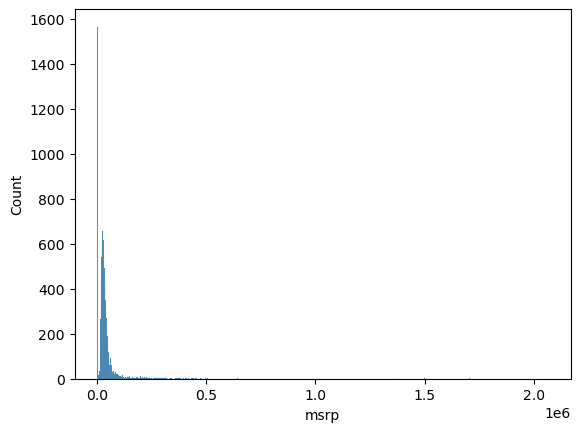

In [103]:
import matplotlib.pyplot as plt
import seaborn as sbn

%matplotlib inline
sbn.histplot(df.msrp)

> **IMPORTANT:** Notice there is a long tail in the distribution. Then we need to get rid of that long tail to get a good performance of our ML-model. Logaritmic function is commonly used for this purpose.

<AxesSubplot:xlabel='msrp', ylabel='Count'>

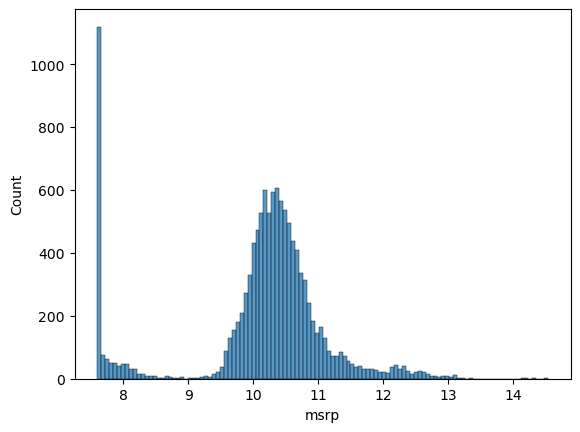

In [104]:
log_price = np.log1p(df.msrp)
sbn.histplot(log_price)

Check the graph above. Notice that the grpah is much better now, it is close to normal distribution function which is excelent for ML-models (ML-models get very good performance if the targte variable has a quasi-normal distribution)

### Check missing values

In [105]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

### Setting up validation framework

In [106]:
df_train, df_val, df_test = commons.split_train_val_test(df, random_seed=2)

y_train = np.log1p(df_train.msrp.to_numpy())
y_val = np.log1p(df_val.msrp.to_numpy())
y_test = np.log1p(df_test.msrp.to_numpy())

target_column = 'msrp'

del df_train[target_column]
del df_val[target_column]
del df_test[target_column]

### Baseline solution

In [107]:
base_columns = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

class BaseLineModel(commons.RegressionNormalFormModel):
    def extract_matrix_features(self, df: pd.DataFrame) -> np.ndarray:
        return df[base_columns].fillna(0).to_numpy()
        

base_model = BaseLineModel()
X_train = base_model.prepare_X(df_train)
base_model.train(X_train, y_train)
y_pred = base_model.predict(X=X_train)


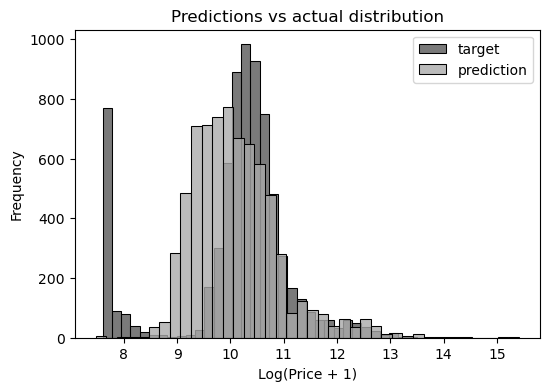

In [108]:
plt.figure(figsize=(6, 4))

sbn.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sbn.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [109]:
train_error = commons.msre(y_pred, y_train)
validation_error = commons.msre(base_model.predict(df=df_val), y_val)
print("Train error: ", train_error)
print("Validation error: ", validation_error)

Train error:  0.7554591756909307
Validation error:  0.7618297535729615


### Simple feature engineering

In [110]:
class SimpleFeatureEngineringModel(commons.RegressionNormalFormModel):
    def __init__(self, categorical_columns_to_use=[], top_values_to_use=5) -> None:
        super().__init__()
        self.categorical_columns_to_use = categorical_columns_to_use
        self.top_values_to_use = top_values_to_use
        self.category_values_map = None

    def one_hot_encoder(self, df: pd.DataFrame, columns: np.array, pick_top_categories: int) -> np.ndarray:
        if self.category_values_map is None:
            self.category_values_map = {}
            for column in columns:
                idx = df[column].value_counts().head(pick_top_categories).index
                self.category_values_map[column] = idx
        response = None
        for column,idx in self.category_values_map.items():
            for v in idx:
                has_column_value_v = (df[column] == v).astype(int).values
                response = has_column_value_v if response is None else np.column_stack((response, has_column_value_v))
        return response

    def extract_matrix_features(self, df: pd.DataFrame) -> np.ndarray:
        X = df[base_columns].fillna(0).to_numpy()
        X = np.column_stack(
            (
                X, 
                2017 - df['year'].to_numpy(), # Adding a column with the `age = 2017 - year(of frabication)`
                self.one_hot_encoder(df, self.categorical_columns_to_use, pick_top_categories=self.top_values_to_use) # Adding categorical columns   
            ))
        return X


sfe_model = SimpleFeatureEngineringModel(categorical_columns_to_use=['number_of_doors', 'make'], top_values_to_use=5)
X_train = sfe_model.prepare_X(df_train)
sfe_model.train(X_train, y_train)
y_pred = sfe_model.predict(X=X_train)

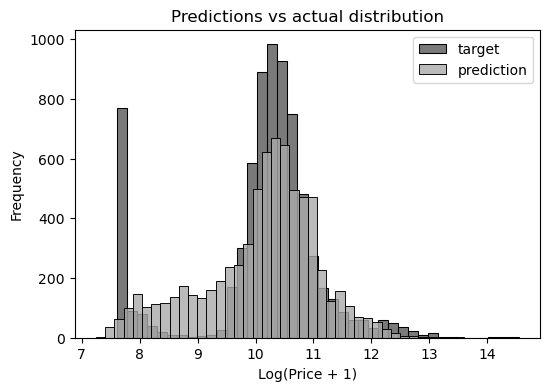

In [111]:
plt.figure(figsize=(6, 4))

sbn.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sbn.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [112]:
train_error = commons.msre(y_pred, y_train)
validation_error = commons.msre(sfe_model.predict(df=df_val), y_val)
print("Train error: ", train_error)
print("Validation error: ", validation_error)

Train error:  0.505930401897355
Validation error:  0.5074572881972735


### Adding column `engine_fuel_type`

In [113]:
sfe_model = SimpleFeatureEngineringModel(categorical_columns_to_use=['number_of_doors', 'make', 'engine_fuel_type'], top_values_to_use=5)
X_train = sfe_model.prepare_X(df_train)
sfe_model.train(X_train, y_train)
y_pred = sfe_model.predict(X=X_train)

train_error = commons.msre(y_pred, y_train)
validation_error = commons.msre(sfe_model.predict(df=df_val), y_val)
print("Train error: ", train_error)
print("Validation error: ", validation_error)

Train error:  0.47816685213716603
Validation error:  0.4741479227441756


### Adding column `transmission_type`

In [114]:

sfe_model = SimpleFeatureEngineringModel(categorical_columns_to_use=['number_of_doors', 'make', 'engine_fuel_type', 'transmission_type'], top_values_to_use=5)
X_train = sfe_model.prepare_X(df_train)
sfe_model.train(X_train, y_train)
y_pred = sfe_model.predict(X=X_train)

train_error = commons.msre(y_pred, y_train)
validation_error = commons.msre(sfe_model.predict(df=df_val), y_val)
print("Train error: ", train_error)
print("Validation error: ", validation_error)

Train error:  0.4702943081869225
Validation error:  0.4655999934528969


### Adding columns `driven_wheels`, `market_category`, `vehicle_size`, `vehicle_style`

In [115]:
sfe_model = SimpleFeatureEngineringModel(categorical_columns_to_use=[
    'number_of_doors', 
    'make', 
    'engine_fuel_type', 
    'transmission_type', 
    'driven_wheels', 
    'market_category', 
    'vehicle_size', 
    'vehicle_style'
    ], top_values_to_use=5)
X_train = sfe_model.prepare_X(df_train)
sfe_model.train(X_train, y_train)
y_pred = sfe_model.predict(X=X_train)

train_error = commons.msre(y_pred, y_train)
validation_error = commons.msre(sfe_model.predict(df=df_val), y_val)
print("Train error: ", train_error)
print("Validation error: ", validation_error)

Train error:  0.46024472901543
Validation error:  0.45646666563847177


### Applying regularization

In [116]:
for r in [0, 0.001, 0.01, 0.1, 1, 10]:
    sfe_model = SimpleFeatureEngineringModel(categorical_columns_to_use=[
        'number_of_doors', 
        'make', 
        'engine_fuel_type', 
        'transmission_type', 
        'driven_wheels', 
        'market_category', 
        'vehicle_size', 
        'vehicle_style'
        ], top_values_to_use=5)
    X_train = sfe_model.prepare_X(df_train)
    sfe_model.train(X_train, y_train, reg=r)
    y_pred = sfe_model.predict(X=X_train)

    train_error = commons.msre(y_pred, y_train)
    validation_error = commons.msre(sfe_model.predict(df=df_val), y_val)
    print("Reg: ", r)
    print("Train error: ", train_error)
    print("Validation error: ", validation_error)
    print()

Reg:  0
Train error:  0.46024472901543
Validation error:  0.45646666563847177

Reg:  0.001
Train error:  0.4602447313054438
Validation error:  0.4564671469130828

Reg:  0.01
Train error:  0.46024495559545425
Validation error:  0.45647150526600466

Reg:  0.1
Train error:  0.4602651853118151
Validation error:  0.45651759517679624

Reg:  1
Train error:  0.4612225158315918
Validation error:  0.45715914390329493

Reg:  10
Train error:  0.47473625354940485
Validation error:  0.47005207434235663



Without regularization the model behaves better

> **IMPORTANT NOTE:** Until here is what is discussed in the regression lesson of ML-zoomcamp, in next sections I dive deeper in the feature extraction.

### Adding more than 5 top categories' values

In [117]:
for c in [
            'number_of_doors', 
            'make', 
            'engine_fuel_type', 
            'transmission_type', 
            'driven_wheels', 
            'market_category', 
            'vehicle_size', 
            'vehicle_style'
            ]:
    print(c, df[c].value_counts().shape[0])

number_of_doors 3
make 48
engine_fuel_type 10
transmission_type 5
driven_wheels 4
market_category 71
vehicle_size 3
vehicle_style 16


In [118]:
best_model = None
best_validation = 100000000
for r in [0, 0.001, 0.01, 0.1, 1, 10]:
    for t in [5, 7, 10, 48]:
        sfe_model = SimpleFeatureEngineringModel(categorical_columns_to_use=[
            'number_of_doors', 
            'make', 
            'engine_fuel_type', 
            'transmission_type', 
            'driven_wheels', 
            'market_category', 
            'vehicle_size', 
            'vehicle_style'
            ], top_values_to_use=t)
        X_train = sfe_model.prepare_X(df_train)
        sfe_model.train(X_train, y_train, reg=r)
        y_pred = sfe_model.predict(X=X_train)

        train_error = commons.msre(y_pred, y_train)
        validation_error = commons.msre(sfe_model.predict(df=df_val), y_val)
        print("Top categories: ", t)
        print("Reg: ", r)
        print("Train error: ", train_error)
        print("Validation error: ", validation_error)
        print()
        if (validation_error<best_validation):
            best_validation = validation_error
            best_model = (t, r)
print(best_validation)
print(best_model)

Top categories:  5
Reg:  0
Train error:  0.46024472901543
Validation error:  0.45646666563847177

Top categories:  7
Reg:  0
Train error:  0.4536546937511136
Validation error:  0.45087077415435356

Top categories:  10
Reg:  0
Train error:  0.44560301648341255
Validation error:  0.4422523715292123

Top categories:  48
Reg:  0
Train error:  0.401634786573494
Validation error:  0.4107091484619655

Top categories:  5
Reg:  0.001
Train error:  0.4602447313054438
Validation error:  0.4564671469130828

Top categories:  7
Reg:  0.001
Train error:  0.4536546959730992
Validation error:  0.45087105872830513

Top categories:  10
Reg:  0.001
Train error:  0.445603026180096
Validation error:  0.4422477253989814

Top categories:  48
Reg:  0.001
Train error:  0.4016347956228215
Validation error:  0.4107041816356491

Top categories:  5
Reg:  0.01
Train error:  0.46024495559545425
Validation error:  0.45647150526600466

Top categories:  7
Reg:  0.01
Train error:  0.4536549134138109
Validation error:  0.

### Engineering `market_category` column

In [119]:
df.market_category.head()

0    factory_tuner,luxury,high-performance
1                       luxury,performance
2                  luxury,high-performance
3                       luxury,performance
4                                   luxury
Name: market_category, dtype: object

Notice that this column has comma-separable values, we can add a new categorical column for each of these values.
> For example: if a car $X$ has `market_category='luxury,performance'` then this can be transformed to `luxury=1`, `performance=1`, `factory_turner=0` and aso on with any other categorical value present in the dataframe which is not in this specific car

In [120]:
ls = df.market_category.str.split(',').to_list()
s = set()
for l in ls:
    if type(l) is list:
        for v in l:
            s.add(v)
market_categories = list(s)
market_categories

['hybrid',
 'diesel',
 'performance',
 'high-performance',
 'flex_fuel',
 'exotic',
 'luxury',
 'factory_tuner',
 'crossover',
 'hatchback']

Check that we only need to add 10 columns, while previously we were considering as columns combinations of these values

In [121]:
class NotSoSimpleFeatureEngineringModel(commons.RegressionNormalFormModel):
    def __init__(self, categorical_columns_to_use=[], top_values_to_use=5) -> None:
        super().__init__()
        self.categorical_columns_to_use = categorical_columns_to_use
        self.top_values_to_use = top_values_to_use
        self.category_values_map = None

    def one_hot_encoder(self, df: pd.DataFrame, columns: np.array, pick_top_categories: int) -> np.ndarray:
        if self.category_values_map is None:
            self.category_values_map = {}
            for column in columns:
                idx = df[column].value_counts().head(pick_top_categories).index
                self.category_values_map[column] = idx
        response = None
        for column,idx in self.category_values_map.items():
            for v in idx:
                has_column_value_v = (df[column] == v).astype(int).values
                response = has_column_value_v if response is None else np.column_stack((response, has_column_value_v))
        return response

    def extract_matrix_features(self, df: pd.DataFrame) -> np.ndarray:
        X = df[base_columns].fillna(0).to_numpy()
        for cat in ['hybrid', 'diesel', 'performance', 'high-performance', 'flex_fuel', 'exotic', 'luxury', 'factory_tuner', 'crossover', 'hatchback']:
            X = np.column_stack((X, df['market_category'].str.contains(cat).fillna(0).astype(int)))
        X = np.column_stack(
            (
                X, 
                2017 - df['year'].to_numpy(), # Adding a column with the `age = 2017 - year(of frabication)`
                self.one_hot_encoder(df, self.categorical_columns_to_use, pick_top_categories=self.top_values_to_use) # Adding categorical columns   
            ))
        return X

best_model = None
best_validation = 100000000
for r in [0, 0.001, 0.01, 0.1, 1, 10]:
    for t in [5, 7, 10, 48]:
        sfe_model = NotSoSimpleFeatureEngineringModel(categorical_columns_to_use=[
            'number_of_doors', 
            'make', 
            'engine_fuel_type', 
            'transmission_type', 
            'driven_wheels', 
            # 'market_category', this is no longer used
            'vehicle_size', 
            'vehicle_style'
            ], top_values_to_use=t)
        X_train = sfe_model.prepare_X(df_train)
        sfe_model.train(X_train, y_train, reg=r)
        y_pred = sfe_model.predict(X=X_train)

        train_error = commons.msre(y_pred, y_train)
        validation_error = commons.msre(sfe_model.predict(df=df_val), y_val)
        print("Top categories: ", t)
        print("Reg: ", r)
        print("Train error: ", train_error)
        print("Validation error: ", validation_error)
        print()
        if (validation_error<best_validation):
            best_validation = validation_error
            best_model = (t, r)
print(best_validation)
print(best_model)

Top categories:  5
Reg:  0
Train error:  0.4319028943888499
Validation error:  0.43076452556970585

Top categories:  7
Reg:  0
Train error:  0.42778674844044945
Validation error:  0.4250849958082839

Top categories:  10
Reg:  0
Train error:  0.42588999649877846
Validation error:  0.4228338165675457

Top categories:  48
Reg:  0
Train error:  0.40533989832747314
Validation error:  0.40726959354619946

Top categories:  5
Reg:  0.001
Train error:  0.43190289601686777
Validation error:  0.43076380418131643

Top categories:  7
Reg:  0.001
Train error:  0.42778675026787916
Validation error:  0.4250850013669068

Top categories:  10
Reg:  0.001
Train error:  0.42589000594825144
Validation error:  0.42282873857348197

Top categories:  48
Reg:  0.001
Train error:  0.4053399059812722
Validation error:  0.40726727086672593

Top categories:  5
Reg:  0.01
Train error:  0.4319030558751857
Validation error:  0.4307573809078188

Top categories:  7
Reg:  0.01
Train error:  0.427786928575522
Validation er

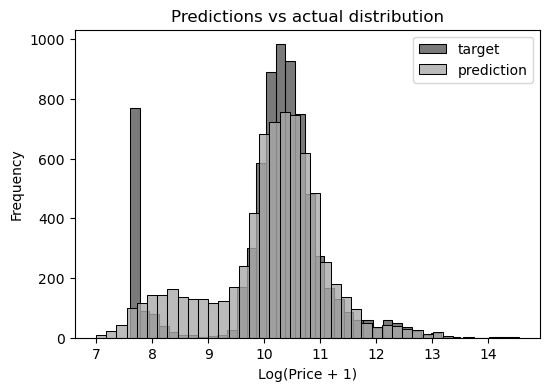

In [122]:
sfe_model = NotSoSimpleFeatureEngineringModel(categorical_columns_to_use=[
    'number_of_doors', 
    'make', 
    'engine_fuel_type', 
    'transmission_type', 
    'driven_wheels', 
    # 'market_category', this is no longer used
    'vehicle_size', 
    'vehicle_style'
    ], top_values_to_use=48)
X_train = sfe_model.prepare_X(df_train)
sfe_model.train(X_train, y_train, reg=0.1)
y_pred = sfe_model.predict(X=X_train)

plt.figure(figsize=(6, 4))

sbn.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sbn.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

## Compare this last solution with Autogluon

In [ ]:
# TODO: Use autogluon and check the performance against my best solution using regression in normal form